<a href="https://colab.research.google.com/github/Sonpositive/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4 Numerical Error and Instability**



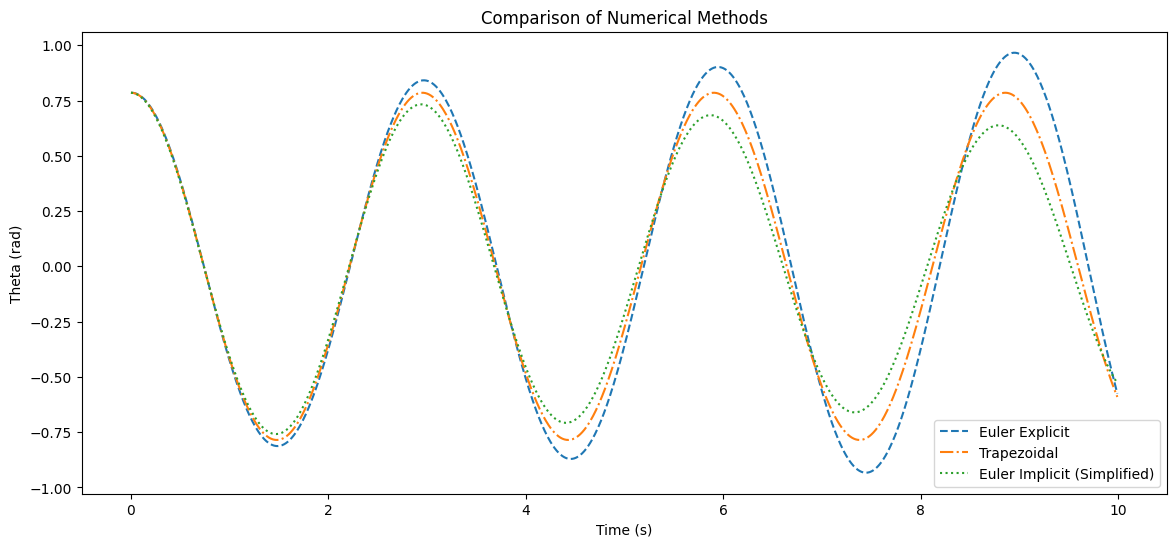

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.8  # Acceleration due to gravity (m/s^2)
l = 2    # Length of the pendulum (m)
theta_initial = np.pi / 4  # Initial angle (radians)
omega_initial = 0  # Initial angular velocity (rad/s)
dt = 0.01  # Time step (s)
t_max = 10  # Total time of simulation (s)
time_steps = np.arange(0, t_max, dt)

# Initialization
theta_explicit = [theta_initial]
omega_explicit = [omega_initial]
theta_trapezoidal = [theta_initial]
omega_trapezoidal = [omega_initial]
theta_implicit = [theta_initial]
omega_implicit = [omega_initial]

# Euler Explicit
for t in time_steps[1:]:
    theta_new = theta_explicit[-1] + omega_explicit[-1] * dt
    omega_new = omega_explicit[-1] - (g / l) * np.sin(theta_explicit[-1]) * dt
    theta_explicit.append(theta_new)
    omega_explicit.append(omega_new)

# Trapezoidal Rule
for t in time_steps[1:]:
    omega_old = omega_trapezoidal[-1]
    theta_old = theta_trapezoidal[-1]
    theta_pred = theta_old + omega_old * dt
    omega_pred = omega_old - (g / l) * np.sin(theta_old) * dt
    theta_new = theta_old + 0.5 * (omega_old + omega_pred) * dt
    omega_new = omega_old - 0.5 * (g / l) * (np.sin(theta_old) + np.sin(theta_pred)) * dt
    theta_trapezoidal.append(theta_new)
    omega_trapezoidal.append(omega_new)

# Simplified Euler Implicit (for demonstration purposes)
for t in time_steps[1:]:
    # Here, we'll use a very naive approach to simulate an implicit method
    # by using the previous step's values as if they were the "future" values
    theta_old = theta_implicit[-1]
    omega_old = omega_implicit[-1]
    omega_new = omega_old - (g / l) * np.sin(theta_old + omega_old * dt) * dt
    theta_new = theta_old + omega_new * dt
    theta_implicit.append(theta_new)
    omega_implicit.append(omega_new)

# Plotting
plt.figure(figsize=(14, 6))

plt.plot(time_steps, theta_explicit, label='Euler Explicit', linestyle='--')
plt.plot(time_steps, theta_trapezoidal, label='Trapezoidal', linestyle='-.')
plt.plot(time_steps, theta_implicit, label='Euler Implicit (Simplified)', linestyle=':')

plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Comparison of Numerical Methods')
plt.legend()
plt.show()


**22.5 Predictor-Corrector and Runge Kutta Methods**

Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the 𝐹 function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.


    


*   Predictor - An explicit formula and 1st estimates the solution at t_j+1 Eulers or another method can be used to finish this step.
*   Corrector - Can be applied to improve accuracy after obtaining the solution S(t_j+1)
    

Runge Kutta (RK) methods are one of the most widely used methods for solving ODEs. The Euler method uses the first two terms in Taylor series to approximate the numerical integration



**22.6 Python ODE Solvers**

The equation dS(t)/dt= sin(t) with the initial condition S(0)=0 can be solved numerically using Python with 'the solve_ivp' function from scipy.integrate. The following code will solve the equation and plot the approximate solution against the exact solution, which in this case is S(t)=−cos(t)+1 (since the integral of
sin
⁡
(
t
)
sin(t) is
−
cos
⁡
(
t
)
−cos(t) and we need to add 1 to satisfy the initial condition
S
(
0
)
=
0
S(0)=0).



<ipython-input-8-fe7c0eec86b2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')
<ipython-input-8-fe7c0eec86b2>:35: RuntimeWarning: invalid value encountered in divide
  relative_error = (sol.y[0] - exact_solution) / exact_solution


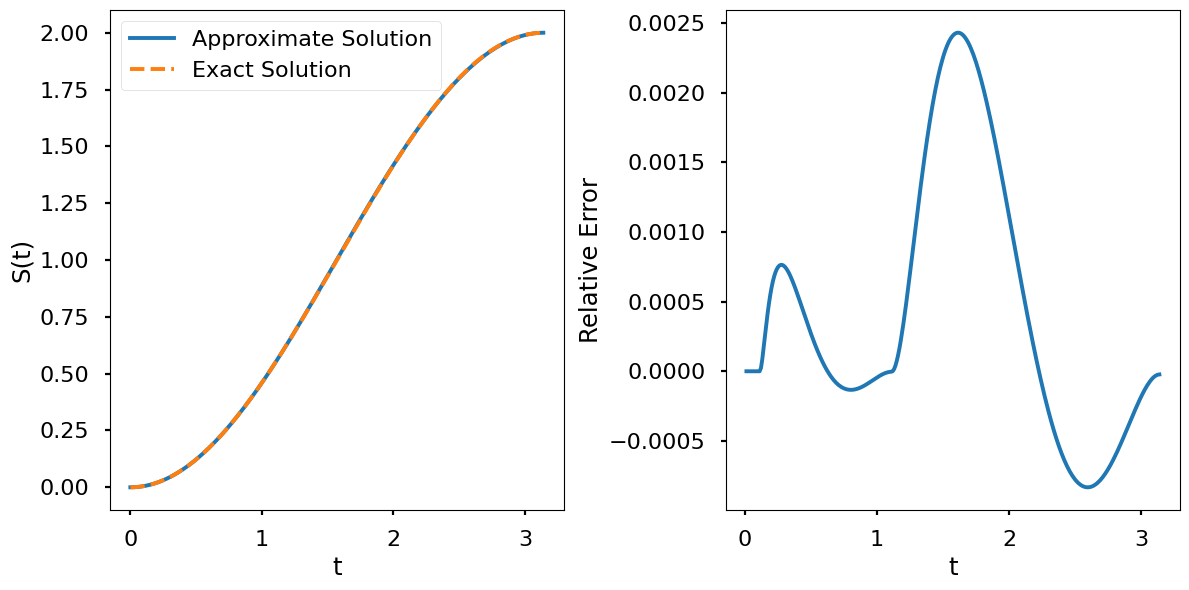

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

# Define the ODE
def ODE(t, S):
    return np.sin(t)

# Initial condition
S0 = [0]

# Time interval for the solution
t_eval = np.arange(0, np.pi, 0.01)

# Solve the ODE
sol = solve_ivp(ODE, [0, np.pi], S0, t_eval=t_eval)

# Exact solution
exact_solution = -np.cos(sol.t) + 1

# Plot the approximate solution and the exact solution
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(sol.t, sol.y[0], label='Approximate Solution')
plt.plot(sol.t, exact_solution, label='Exact Solution', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.legend()

# Plot the relative error
plt.subplot(122)
relative_error = (sol.y[0] - exact_solution) / exact_solution
plt.plot(sol.t, relative_error)
plt.xlabel('t')
plt.ylabel('Relative Error')

plt.tight_layout()
plt.show()
